# Actividad 2: Visualizaciones y EDA

Deberán entregar el segundo avance de su proyecto final. Elegirán uno de los datasets del desafío  
Posteriormente crearán un notebook donde cargaran el archivo utilizando funciones de pandas para luego proceder a realizar 3 gráficos diferentes con Matplotlib/Seaborn/Plotly se debe tener al menos un gráfico con cada librería.  
Finalmente cada gráfico será interpretado con el fin de obtener insights relevantes que permitan dar respuesta a la pregunta problema.

## Dataset escogido: Anime Recommendation Database 2020
Contiene información de 17.562 series de animación japonesa y la opinión de 325.772 usuarios.  
35 Columnas - Más de 17.6K filas.  
URL: https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020

## Procesamiento inicial

In [174]:
#Inicialización
import os
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl

In [175]:
#Lectura del archivo y confirmación de contenido

tabla=pd.read_csv('anime.csv',sep=',',encoding='utf-8')
tabla.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


### Limpieza de datos
Se limpian los datos para hacer una gráfica de clasificación por género. Sin embargo, los géneros del anime de los registros se encuentran agrupados por comas. 

In [176]:
#Se hace una lista donde se almacenarán los géneros 
generos = []

#Para cada uno de los registros
for registro in tabla['Genres']:
    generos.extend(registro.split(","))

#Se limpian los repetidos y se coloca en orden alfabético para que sea más bonito. 
#Primero se ordena. 
generos.sort()
#Se crea una lista que será usada para clasificas los géneros
genero = [] 
#Se hace la lista
for genre in generos:
    if genre not in genero:
        genero.append(genre)


print(len(genero)) #Tenemos 84 géneros distintos. 
print(genero) #Están ordenados alfabeticamente

84
[' Adventure', ' Cars', ' Comedy', ' Dementia', ' Demons', ' Drama', ' Ecchi', ' Fantasy', ' Game', ' Harem', ' Hentai', ' Historical', ' Horror', ' Josei', ' Kids', ' Magic', ' Martial Arts', ' Mecha', ' Military', ' Music', ' Mystery', ' Parody', ' Police', ' Psychological', ' Romance', ' Samurai', ' School', ' Sci-Fi', ' Seinen', ' Shoujo', ' Shoujo Ai', ' Shounen', ' Shounen Ai', ' Slice of Life', ' Space', ' Sports', ' Super Power', ' Supernatural', ' Thriller', ' Vampire', ' Yaoi', ' Yuri', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Unknown', 'Vampire', 'Yaoi']


In [177]:
#Adicionalmente, se eliminan los espacios en blancos de ambos
i=0
for i in range(len(genero)):
    genero[i]=genero[i].strip()

i=0
for i in range(len(generos)):
    generos[i]=generos[i].strip()

print(genero)
print(generos)

['Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Unknown', 'Vampire', 'Yaoi']
['Adventure', 'Adventure', 'Adventure', 'Adventure', 'Adventure', 'Adventure', 'A

**Genero** Será usado como eje x  
**Generos** Será usado como la frecuencia del eje x, es decir, el eje Y

### Eje X y eje Y

In [178]:
#Se crea una lista numerada para organizar el eje x
lenGenre = list(range(84))
print(lenGenre)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]


In [179]:
#Se crea una lista numerada con las frecuencias de los géneros de anime
cont = 0 #Contador de frecuencias
i = 0 #Indicador de indice
frecGenre = [0] * 84 #Lista de frecuencias inicializada en 0
temp = generos[0]
for genre in generos: #Por cada genero que se repita
    if (temp == genre): #Se valida si es igual al registro
        cont=cont+1 #Se suma el contador de frecuencia para dicho registro
    else: #Si no es el mismo, es porque pasamos a la siguiente palabra
        frecGenre[i] = cont #Se coloca en el indice que se trabaja, la frecuencia de dicha palabra
        # Empezamos con un nuevo género
        cont = 1 #Contador pasa 
        i = i+1 #El indicador aumenta
        temp = genero[i] #Genero pasa a ser la siguiente palabra
frecGenre[i] = cont #Ultima iteración

print(frecGenre) #Tenemos nuestro eje Y

[1477, 71, 2909, 130, 430, 1819, 637, 2767, 203, 253, 183, 883, 379, 94, 1584, 973, 416, 1017, 471, 791, 533, 585, 234, 297, 1751, 193, 1593, 2048, 820, 680, 79, 1981, 98, 944, 461, 543, 622, 1418, 128, 133, 39, 32, 3888, 1480, 62, 3120, 382, 71, 800, 130, 518, 183, 146, 1165, 261, 83, 3, 1081, 108, 9, 84, 105, 1453, 194, 75, 13, 48, 148, 9, 49, 535, 10, 8, 22, 2, 970, 34, 170, 10, 61, 3, 63, 3, 3]


## Matplotlib

Son 84 géneros a mostrar.  
Se pueden dividir en 4 por figura.  
Serían 21 figuras distintas. Se distribuye en 7 filas y 3 columnas

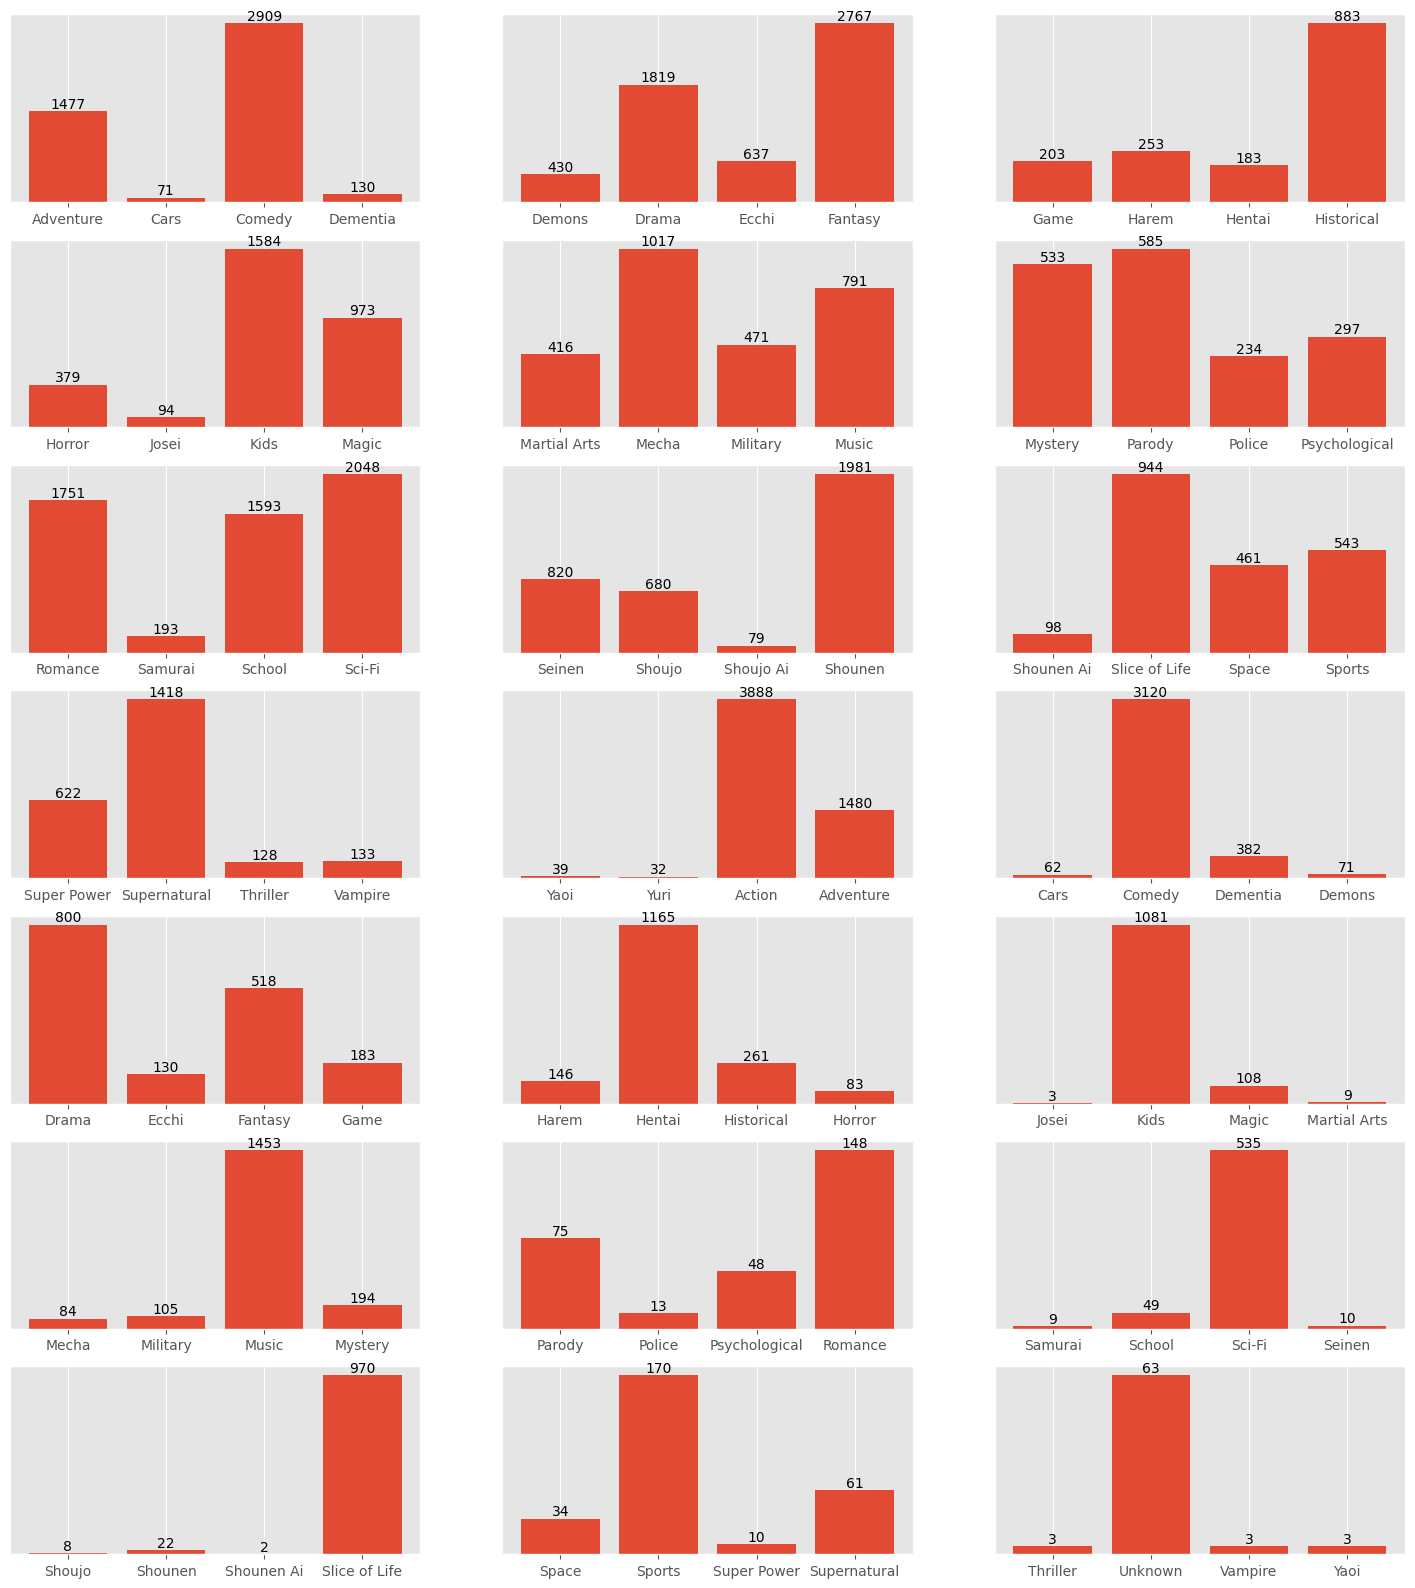

In [193]:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(18,20))
ax[0,0].bar(lenGenre[0:4], frecGenre[0:4]); ax[0,0].set_xticks(lenGenre[0:4],genero[0:4]); ax[0,0].bar_label(ax[0,0].containers[0], label_type='edge'); ax[0,0].get_yaxis().set_visible(False)
ax[0,1].bar(lenGenre[4:8], frecGenre[4:8]); ax[0,1].set_xticks(lenGenre[4:8], genero[4:8]); ax[0,1].bar_label(ax[0,1].containers[0], label_type='edge'); ax[0,1].get_yaxis().set_visible(False)
ax[0,2].bar(lenGenre[8:12], frecGenre[8:12]); ax[0,2].set_xticks(lenGenre[8:12], genero[8:12]); ax[0,2].bar_label(ax[0,2].containers[0], label_type='edge'); ax[0,2].get_yaxis().set_visible(False)
ax[1,0].bar(lenGenre[12:16], frecGenre[12:16]); ax[1,0].set_xticks(lenGenre[12:16], genero[12:16]); ax[1,0].bar_label(ax[1,0].containers[0], label_type='edge'); ax[1,0].get_yaxis().set_visible(False)
ax[1,1].bar(lenGenre[16:20], frecGenre[16:20]); ax[1,1].set_xticks(lenGenre[16:20], genero[16:20]); ax[1,1].bar_label(ax[1,1].containers[0], label_type='edge'); ax[1,1].get_yaxis().set_visible(False)
ax[1,2].bar(lenGenre[20:24], frecGenre[20:24]); ax[1,2].set_xticks(lenGenre[20:24], genero[20:24]); ax[1,2].bar_label(ax[1,2].containers[0], label_type='edge'); ax[1,2].get_yaxis().set_visible(False)
ax[2,0].bar(lenGenre[24:28], frecGenre[24:28]); ax[2,0].set_xticks(lenGenre[24:28], genero[24:28]); ax[2,0].bar_label(ax[2,0].containers[0], label_type='edge'); ax[2,0].get_yaxis().set_visible(False)
ax[2,1].bar(lenGenre[28:32], frecGenre[28:32]); ax[2,1].set_xticks(lenGenre[28:32], genero[28:32]); ax[2,1].bar_label(ax[2,1].containers[0], label_type='edge'); ax[2,1].get_yaxis().set_visible(False)
ax[2,2].bar(lenGenre[32:36], frecGenre[32:36]); ax[2,2].set_xticks(lenGenre[32:36], genero[32:36]); ax[2,2].bar_label(ax[2,2].containers[0], label_type='edge'); ax[2,2].get_yaxis().set_visible(False)
ax[3,0].bar(lenGenre[36:40], frecGenre[36:40]); ax[3,0].set_xticks(lenGenre[36:40], genero[36:40]); ax[3,0].bar_label(ax[3,0].containers[0], label_type='edge'); ax[3,0].get_yaxis().set_visible(False)
ax[3,1].bar(lenGenre[40:44], frecGenre[40:44]); ax[3,1].set_xticks(lenGenre[40:44], genero[40:44]); ax[3,1].bar_label(ax[3,1].containers[0], label_type='edge'); ax[3,1].get_yaxis().set_visible(False)
ax[3,2].bar(lenGenre[44:48], frecGenre[44:48]); ax[3,2].set_xticks(lenGenre[44:48], genero[44:48]); ax[3,2].bar_label(ax[3,2].containers[0], label_type='edge'); ax[3,2].get_yaxis().set_visible(False)
ax[4,0].bar(lenGenre[48:52], frecGenre[48:52]); ax[4,0].set_xticks(lenGenre[48:52], genero[48:52]); ax[4,0].bar_label(ax[4,0].containers[0], label_type='edge'); ax[4,0].get_yaxis().set_visible(False)
ax[4,1].bar(lenGenre[52:56], frecGenre[52:56]); ax[4,1].set_xticks(lenGenre[52:56], genero[52:56]); ax[4,1].bar_label(ax[4,1].containers[0], label_type='edge'); ax[4,1].get_yaxis().set_visible(False)
ax[4,2].bar(lenGenre[56:60], frecGenre[56:60]); ax[4,2].set_xticks(lenGenre[56:60], genero[56:60]); ax[4,2].bar_label(ax[4,2].containers[0], label_type='edge'); ax[4,2].get_yaxis().set_visible(False)
ax[5,0].bar(lenGenre[60:64], frecGenre[60:64]); ax[5,0].set_xticks(lenGenre[60:64], genero[60:64]); ax[5,0].bar_label(ax[5,0].containers[0], label_type='edge'); ax[5,0].get_yaxis().set_visible(False)
ax[5,1].bar(lenGenre[64:68], frecGenre[64:68]); ax[5,1].set_xticks(lenGenre[64:68], genero[64:68]); ax[5,1].bar_label(ax[5,1].containers[0], label_type='edge'); ax[5,1].get_yaxis().set_visible(False)
ax[5,2].bar(lenGenre[68:72], frecGenre[68:72]); ax[5,2].set_xticks(lenGenre[68:72], genero[68:72]); ax[5,2].bar_label(ax[5,2].containers[0], label_type='edge'); ax[5,2].get_yaxis().set_visible(False)
ax[6,0].bar(lenGenre[72:76], frecGenre[72:76]); ax[6,0].set_xticks(lenGenre[72:76], genero[72:76]); ax[6,0].bar_label(ax[6,0].containers[0], label_type='edge'); ax[6,0].get_yaxis().set_visible(False)
ax[6,1].bar(lenGenre[76:80], frecGenre[76:80]); ax[6,1].set_xticks(lenGenre[76:80], genero[76:80]); ax[6,1].bar_label(ax[6,1].containers[0], label_type='edge'); ax[6,1].get_yaxis().set_visible(False)
ax[6,2].bar(lenGenre[80:84], frecGenre[80:84]); ax[6,2].set_xticks(lenGenre[80:84], genero[80:84]); ax[6,2].bar_label(ax[6,2].containers[0], label_type='edge'); ax[6,2].get_yaxis().set_visible(False)


## Seaborn

## Plotly